In [1]:
#各ライブラリのimport
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

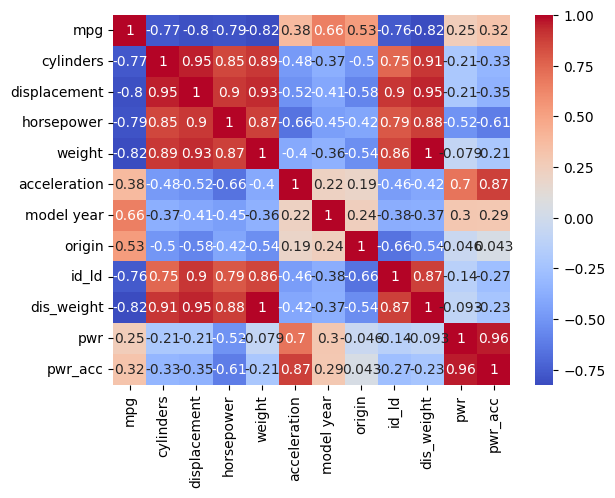

In [16]:
df_train = pd.read_csv('データ/train.tsv' , sep = '\t')
df_test = pd.read_csv('データ/test.tsv' , sep = '\t')
df_train_test = pd.concat([df_train , df_test] , axis =0)
df_train_test['horsepower'] = df_train_test['horsepower'].replace({'?':np.nan}).astype(float)
#df_train['model year'] = df_train['model year'].replace({73:1,70:2,72:3,75:4,76:5,71:6,77:7,78:8,79:9,74:10,82:11,81:12,80:13})
df_train['model year'] = df_train['model year'].replace({73:70,70:71,72:72,75:73,76:74,71:75,77:76,78:77,79:78,74:79,82:80,81:81,80:82})
#シリンダー(気筒数)で割ることで相関を下げる
df_train['id_ld'] = df_train['displacement']/df_train['cylinders']
#dis_weight
df_train['dis_weight'] = df_train['displacement'] + df_train['weight']

df_train.iloc[24 , 4] = df_train_test[df_train_test['displacement'] == 151]['horsepower'].mean()
#renault 18
df_train.iloc[113 , 4] = df_train_test[(98 <= df_train_test['displacement']) & (df_train_test['displacement']<= 102)]['horsepower'].mean()
#renault lecar deluxe
df_train.iloc[145 , 4] = df_train_test[df_train_test['displacement'] == 85]['horsepower'].mean()
#ford pintot
df_train.iloc[175 , 4] = df_train_test[df_train_test['car name'] == 'ford pinto']['horsepower'].mean()
#pwr
df_train['pwr'] = df_train['weight'].astype(float)/df_train['horsepower'].astype(float)
#pwr_acc
df_train['pwr_acc'] = df_train['pwr'] + df_train['acceleration']
df_train_drop = df_train.drop([ 'id' , 'car name' ,] , axis = 1)
#相関係数のヒートマップ
sns.heatmap(df_train_drop.corr() , cmap='coolwarm' , annot=True)
plt.show()
#year降りなおした方が相関係数は上がる
#多重共線性はr>0.95

In [17]:
#カラム変更まとめ
#データ読み込み
df_train = pd.read_csv('データ/train.tsv' , sep = '\t')
df_test = pd.read_csv('データ/test.tsv' , sep = '\t')
df_train_test = pd.concat([df_train , df_test] , axis =0)
#print(df_train_test[df_train_test['horsepower'] == "?"])
df_train_test['horsepower'] = df_train_test['horsepower'].replace({'?':np.nan}).astype(float)
df_train[df_train['horsepower'].isnull()]#欠損値を含むカラムの抽出
#欠損値補完
#amc concord dl
df_train_test.iloc[24 , 4] = df_train_test[df_train_test['displacement'] == 151]['horsepower'].mean()
#renault 18
df_train_test.iloc[113 , 4] = df_train_test[(98 <= df_train_test['displacement']) & (df_train_test['displacement']<= 102)]['horsepower'].mean()
#renault lecar deluxe
df_train_test.iloc[145 , 4] = df_train_test[df_train_test['displacement'] == 85]['horsepower'].mean()
#ford pinto
df_train_test.iloc[175 , 4] = df_train_test[df_train_test['car name'] == 'ford pinto']['horsepower'].mean()
#ford maverick
df_train_test.loc[70 , 'horsepower'] = df_train_test[df_train_test['car name'] == "ford maverick"]['horsepower'].mean()
#ford mustang cobra
df_train_test.loc[112 , 'horsepower'] = df_train_test[df_train_test['displacement'] == 140]['horsepower'].mean()

#pwrカラムの作成
#df_train_test['pwr'] = df_train_test['weight']/df_train_test['horsepower']

#id_ldカラム作成
#df_train['id_ld'] = df_train['displacement']/ df_train['cylinders']

#dis_weightカラムの作成
df_train_test['dis_weight'] = df_train_test['displacement'] + df_train_test['weight']

#年代の番号降り直し
#df_train_test['model year'] = df_train_test['model year'].replace({73:1,70:2,72:3,75:4,76:5,71:6,77:7,78:8,79:9,74:10,82:11,81:12,80:13})
#年代降り直し(70~82)
#df_train_test['model year'] = df_train_test['model year'].replace({73:70,70:71,72:72,75:73,76:74,71:75,77:76,78:77,79:78,74:79,82:80,81:81,80:82})
#df_train_test['model_year_']=df_train_test['model year']
#print(df_train_test['model year'].head())

#ラベルエンコーディング(train,test結合版)
#メーカーカラム作成
df_split = df_train_test['car name'].str.split(expand = True)#str.split('')で文字列を''で分割(入力しないと空白で分割される)
df_train_test['manufacturers name'] = df_split.iloc[:, 0]
df_train_test['manufacturers name'] = df_train_test['manufacturers name'].replace({"toyouta":"toyota", "vw":"volkswagen", "vokswagen":"volkswagen",  "chevroelt":"chevrolet" ,  "chevy":"chevrolet","mercury":"ford", "datsun":"nissan", "maxda":"mazda",  "mercedes":"mercedes-benz"})#カラム名の修正
#国とメーカーカラムの結合
df_train_test['manufacturers_country'] = df_train_test['manufacturers name'] + df_train_test['origin'].astype(str) 
#メーカーとmodel yearの結合
#df_train_test['manufacturers_year'] = df_train_test['manufacturers name'] + df_train_test['model year'].astype(str)
#国とmodel yearの結合
#df_train_test['origin_year'] =df_train_test['origin'].astype(str) + _ + df_train_test['model year'].astype(str)
#3つとも結合
#df_train_test['manufacturers_country_year'] = df_train_test['manufacturers name'] + df_train_test['origin'].astype(str) + df_train_test['model year'].astype(str)
#エンコーディング
df_number = pd.get_dummies(df_train_test , columns = [  'manufacturers_country',
                                                        #'manufacturers_country_year'
                                                        #'manufacturers name' ,
                                                        #'model year' ,
                                                        #'manufacturers_year',
                                                        #'origin'
                                                      ] , dtype = int)

df_train = df_number.iloc[:199 , :]
df_test = df_number.iloc[199: , :]

#学習
#目的変数の分離
X = df_train.drop([ 'id' , 'car name' , 'mpg' , 
                   'cylinders',
                   'weight',
                    'manufacturers name' , 
                    #'model year' , 
                    #'origin',
                    'displacement'
                    ] , axis = 1)
y = df_train['mpg']
features_test = df_test.drop([ 'id' , 'car name' , 'mpg' , 
                              'cylinders',
                              'weight',
                               'manufacturers name' , 
                               #'model year' , 
                               #'origin',
                               'displacement'
                              ] , axis = 1)


In [18]:
from seaborn_analyzer import regplot
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
seed = 42
# 使用するチューニング対象外のパラメータ
params = {
    'objective': 'regression',  # 最小化させるべき損失関数
    'metric': 'rmse',  # 学習時に使用する評価指標(early_stoppingの評価指標にも同じ値が使用される)
    'random_state': seed,  # 乱数シード
    'boosting_type': 'gbdt',  # boosting_type
    'n_estimators': 10000,  # 最大学習サイクル数。early_stopping使用時は大きな値を入力
    'verbose': -1,  # これを指定しないと`No further splits with positive gain, best gain: -inf`というWarningが表示される
    'early_stopping_round': 10  # ここでearly_stoppingを指定
    }
# モデル作成
model = LGBMRegressor(**params)

# 学習時fitパラメータ指定 (early_stopping用のデータeval_setを渡す)
fit_params = {
    'eval_set': [(X, y)]
    }
scoring = 'neg_root_mean_squared_error'  # 評価指標をRMSEに指定
# クロスバリデーションで評価指標算出
#scores = cross_val_score(model, X_cv, y_cv, cv=cv,
                         #scoring=scoring, n_jobs=-1, fit_params=fit_params)
# クロスバリデーションして予測値ヒートマップを可視化
cv = KFold(n_splits=3, shuffle=True, random_state=seed)  # KFoldでクロスバリデーション分割指定

In [15]:
model.fit(X , y , **fit_params )
df_pred = pd.DataFrame(model.predict(features_test))
df_test = pd.read_csv('データ/test.tsv' , sep = '\t')
df_pred = pd.merge(df_test['id'].astype(int) , df_pred , how = 'outer' , right_index = True , left_index=True)
df_pred
#評価
df_pred.to_csv('LGBM_proto_sample_submit.csv' , header = False , index = False)

c:\Users\shouh\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightgbm\callback.py:340: UserWarning: Only training set found, disabling early stopping.
  _log_warning('Only training set found, disabling early stopping.')


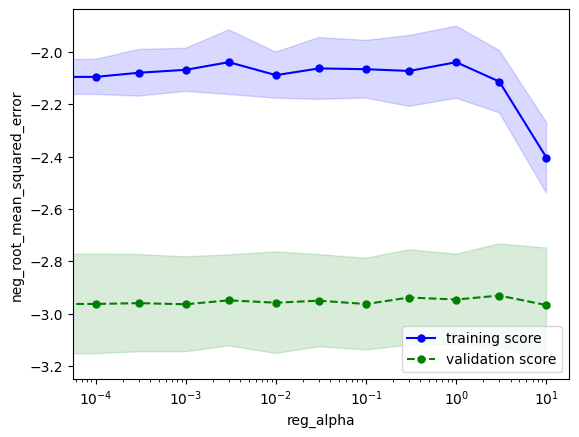

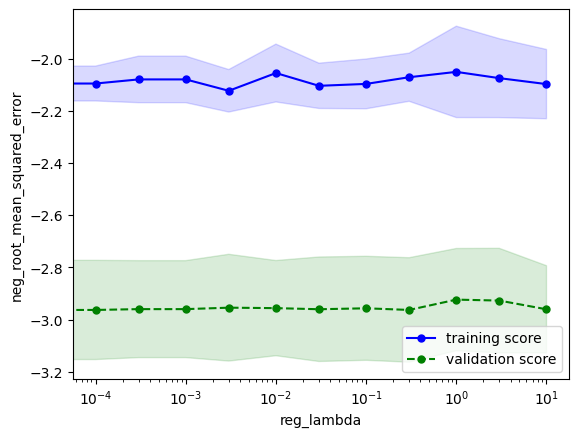

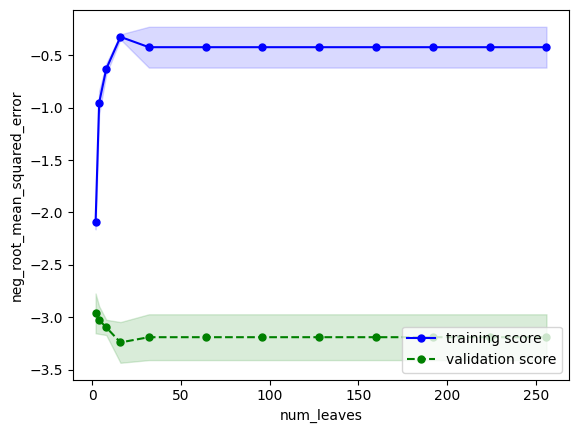

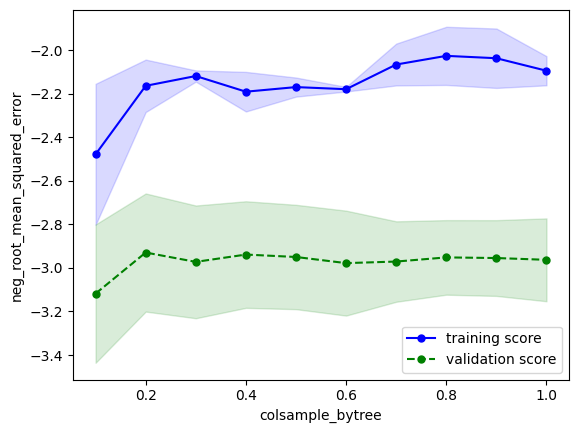

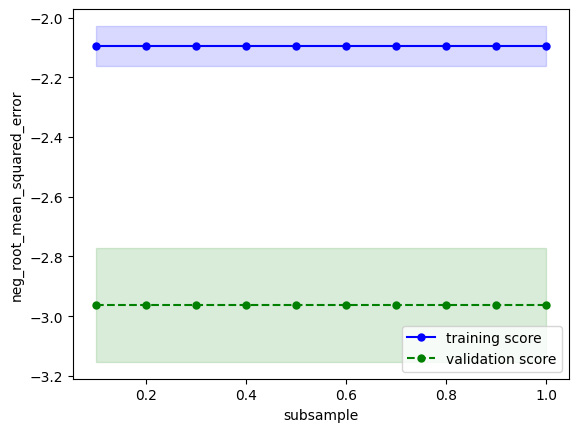

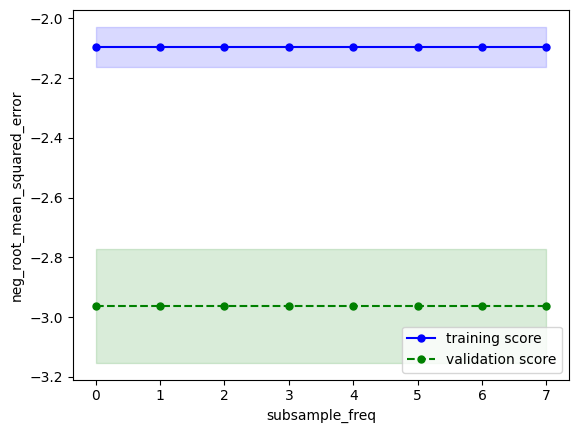

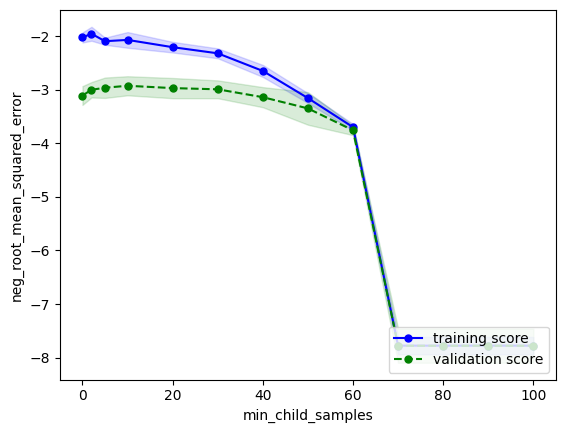

In [19]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
cv_params = {'reg_alpha': [0, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10],
             'reg_lambda': [0, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10],
             'num_leaves': [2, 4, 8, 16, 32, 64, 96, 128, 160, 192, 224, 256],
             'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
             'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
             'subsample_freq': [0, 1, 2, 3, 4, 5, 6, 7],
             'min_child_samples': [0, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
             }
param_scales = {'reg_alpha': 'log',
                'reg_lambda': 'log',
                'num_leaves': 'linear',
                'colsample_bytree': 'linear',
                'subsample': 'linear',
                'subsample_freq': 'linear',
                'min_child_samples': 'linear'
                }
# 検証曲線のプロット（パラメータ毎にプロット）
model.set_params(min_child_samples=5, num_leaves=2)
for i, (k, v) in enumerate(cv_params.items()):
    train_scores, valid_scores = validation_curve(estimator=model,
                                                  X=X, y=y,
                                                  param_name=k,
                                                  param_range=v,
                                                  fit_params=fit_params,
                                                  cv=cv, scoring=scoring,
                                                  n_jobs=-1)
    # 学習データに対するスコアの平均±標準偏差を算出
    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    train_center = train_mean
    train_high = train_mean + train_std
    train_low = train_mean - train_std
    # テストデータに対するスコアの平均±標準偏差を算出
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std  = np.std(valid_scores, axis=1)
    valid_center = valid_mean
    valid_high = valid_mean + valid_std
    valid_low = valid_mean - valid_std
    # training_scoresをプロット
    plt.plot(v, train_center, color='blue', marker='o', markersize=5, label='training score')
    plt.fill_between(v, train_high, train_low, alpha=0.15, color='blue')
    # validation_scoresをプロット
    plt.plot(v, valid_center, color='green', linestyle='--', marker='o', markersize=5, label='validation score')
    plt.fill_between(v, valid_high, valid_low, alpha=0.15, color='green')
    # スケールをparam_scalesに合わせて変更
    plt.xscale(param_scales[k])
    # 軸ラベルおよび凡例の指定
    plt.xlabel(k)  # パラメータ名を横軸ラベルに
    plt.ylabel(scoring)  # スコア名を縦軸ラベルに
    plt.legend(loc='lower right')  # 凡例
    # グラフを描画
    plt.show()

In [23]:
import optuna
()
# ベイズ最適化時の評価指標算出メソッド
def bayes_objective(trial):
    params = {
        'reg_alpha': trial.suggest_float('reg_alpha', 0.003, 0.3, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0001, 0.1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 30, 250),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'subsample_freq': trial.suggest_int('subsample_freq', 0, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 60)
    }
    # モデルにパラメータ適用
    model.set_params(**params)
    # cross_val_scoreでクロスバリデーション
    scores = cross_val_score(model, X, y, cv=cv,
                             scoring=scoring, fit_params=fit_params, n_jobs=-1)
    val = scores.mean()
    return val

# ベイズ最適化を実行
study = optuna.create_study(direction='maximize',
                            sampler=optuna.samplers.TPESampler(seed=seed))
study.optimize(bayes_objective, n_trials=600)

# 最適パラメータの表示と保持
best_params = study.best_trial.params
best_score = study.best_trial.value
model.set_params(**best_params)
model.fit(X , y , **fit_params )
df_pred = pd.DataFrame(model.predict(features_test))
df_test = pd.read_csv('データ/test.tsv' , sep = '\t')
df_pred = pd.merge(df_test['id'].astype(int) , df_pred , how = 'outer' , right_index = True , left_index=True)
df_pred
#評価
df_pred.to_csv('LGBM_BY_proto_sample_submit.csv' , header = False , index = False)

[I 2024-03-12 18:20:08,796] A new study created in memory with name: no-name-87065844-d596-4ac3-9d36-23bd5177f6cf
[I 2024-03-12 18:20:08,907] Trial 0 finished with value: -2.9006381729602673 and parameters: {'reg_alpha': 0.01683454924600351, 'reg_lambda': 0.07114476009343425, 'num_leaves': 191, 'colsample_bytree': 0.759195090518222, 'subsample': 0.4936111842654619, 'subsample_freq': 1, 'min_child_samples': 12}. Best is trial 0 with value: -2.9006381729602673.
[I 2024-03-12 18:20:09,152] Trial 1 finished with value: -3.0871304015287495 and parameters: {'reg_alpha': 0.16198453229362292, 'reg_lambda': 0.006358358856676255, 'num_leaves': 186, 'colsample_bytree': 0.41235069657748147, 'subsample': 0.9819459112971965, 'subsample_freq': 6, 'min_child_samples': 20}. Best is trial 0 with value: -2.9006381729602673.
[I 2024-03-12 18:20:09,221] Trial 2 finished with value: -3.6191922954118554 and parameters: {'reg_alpha': 0.006930605663535877, 'reg_lambda': 0.0003549878832196505, 'num_leaves': 97,